# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [232]:
trainings_by_day = workouts.groupby(pd.Grouper(key="start_at", freq="d"))['workout_id'].count()
trainings_by_day.columns=['workouts']

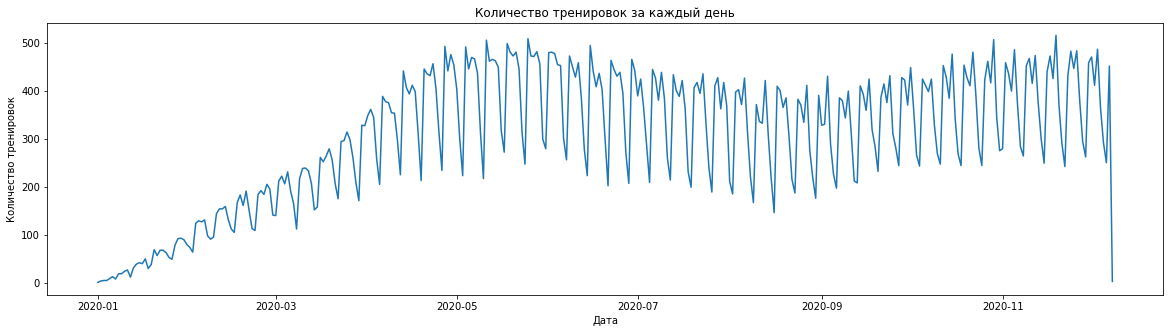

In [198]:
plt.figure(figsize=(20,5))
plt.plot(trainings_by_day)
plt.title('Количество тренировок за каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество тренировок')
plt.show()

### Комментарии:

1) наблюдается увеличение количества тренировок в день в первой трети периода, далее увеличение прекратилось и стало более менее стабильным (похоже, что клуб открылся в начале 2020 года) <br>
2) наблюдается два вида сезонности
- снижение посещаемости в теплое время года, увеличение в холодное (видна просадка по посещаемости с июня по сентябрь), затем опять увеличение
- снижение посещаемости в выходные, увеличение в будни
<br><br>попробуем проверить

<b> Проверка сезонности в посещаемости (тепло-холода) </b>
- добавим скользящее среднее с окном в 60 дней

Наложим график проверки сезонности на основной:

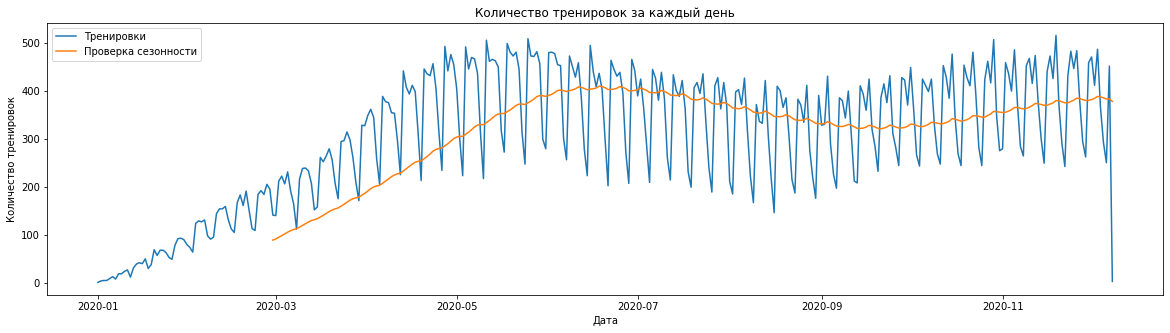

In [256]:
plt.figure(figsize=(20,5))
plt.plot(trainings_by_day, label='Тренировки')
plt.plot(trainings_by_day.rolling(window=60).mean(), label='Проверка сезонности')
plt.title('Количество тренировок за каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество тренировок')
plt.legend()
plt.show()

<b> Проверка сезонности в посещаемости (будни-выходные) </b>
- Добавим столбец `day_of_week`, где 1 - это будни, 0 - это выходные
- Умножим его на макс.значение количества тренировок в день (для графика)

In [201]:
df = trainings_by_day.reset_index()
df['day_of_week'] = df['start_at'].apply(lambda x: df['workout_id'].max() if x.weekday() in range(0,4) else 0)
df = df.set_index('start_at')

Наложим график проверки сезонности на основной:

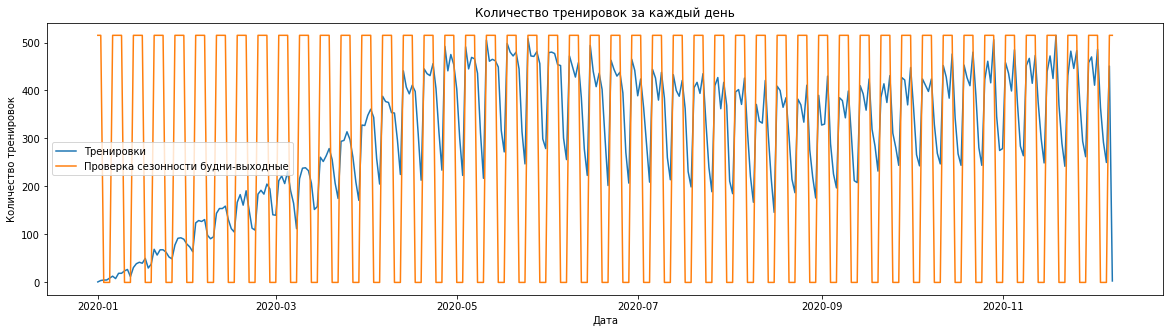

In [203]:
plt.figure(figsize=(20,5))
plt.plot(trainings_by_day, label='Тренировки')
plt.plot(df['day_of_week'], label='Проверка сезонности будни-выходные')
plt.title('Количество тренировок за каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество тренировок')
plt.legend()
plt.show()

<b>Выводы:</b>
- Действительно, наблюдается просадка по посещаемости с июня по сентябрь, затем опять увеличение
- Действительно наблюдается увеличение посещаемости в будни и снижение в выходные

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [234]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [235]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [236]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [237]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

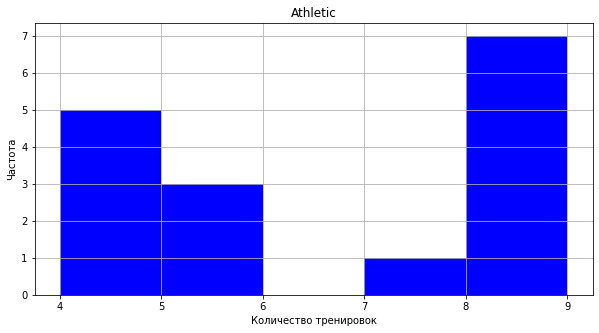

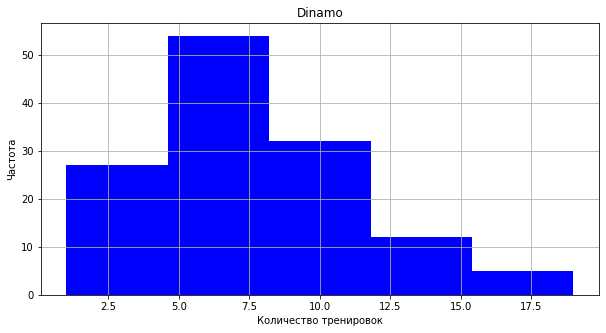

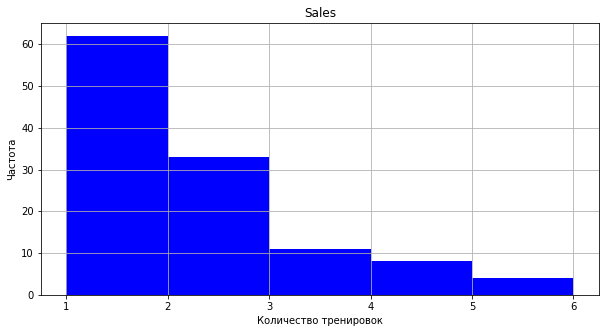

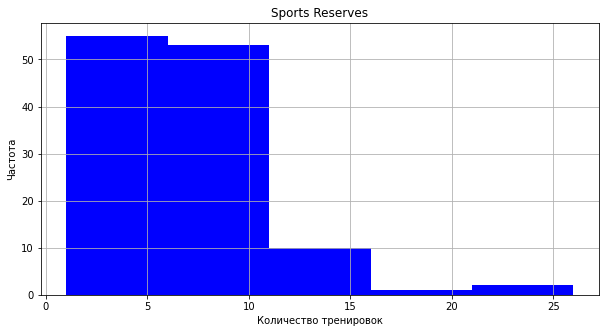

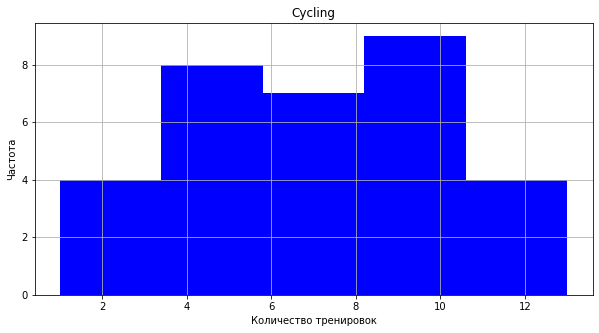

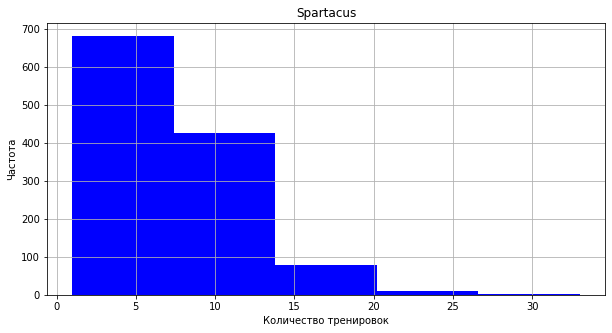

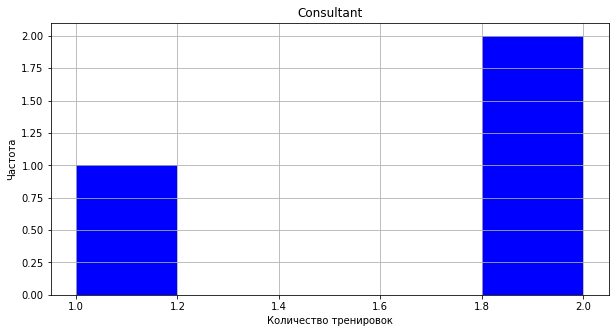

In [245]:
for dep in departments:
    df = workouts_by_trainer[workouts_by_trainer['trainer_department'] == dep]
    plt.figure(figsize=(10,5))
    plt.hist(df['workouts'], 5, color = 'blue')
    plt.title(dep)
    plt.xlabel('Количество тренировок')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

<b>Выводы:</b>
- Графики подтверждают, что в разных департаментах была разная нагрузка в ноябре
- `Athletic` Гистограмма показывает, что чаще всего в этом департаменте у тренеров от 4 до 6, либо от 8 до 9 тренировок в день, такую нагрузку можно оценить как весьма низкую
- `Consultant` Гистограмма показывает, что чаще всего в этом департаменте у тренеров либо 1 либо 2 тренировки, нагрузка очень низкая
- `Cycling` Гистограмма показывает, что у тренеров нагрузка распределена более менее равномерно и чаще всего они имеют от 4 до 10 тренировок в день, нагрузка нормальная
- `Dinamo` Гистограмма показывает, что у тренеров в этом департаменте в основном от 5 до 10 тренировок в день, но есть случаи появления до 17 тренировок в день, высокая нагрузка
- `Sales` Гистограмма показывает, что у тренеров в этом департаменте в основном от 1 до 3 тренировок в день, иногда бывает до 5-6 в день, но редко. Очень низкая нагрузка
- `Spartacus` Гистограмма показывает, что у тренеров в этом департаменте в основном от 1 до 13 тренировок в день, реже встречаются случаи от 15 до 20 тренровок и очень редко до 30 тренировок в день, безумно высокая нагрузка
- `Sports Reserves` Гистограмма показывает, что у тренеров в этом департаменте в основном от 1 до 11 тренировок, реже до 15 и встречаются случаи до 25 тренировок в день, очень высокая нагрузка

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

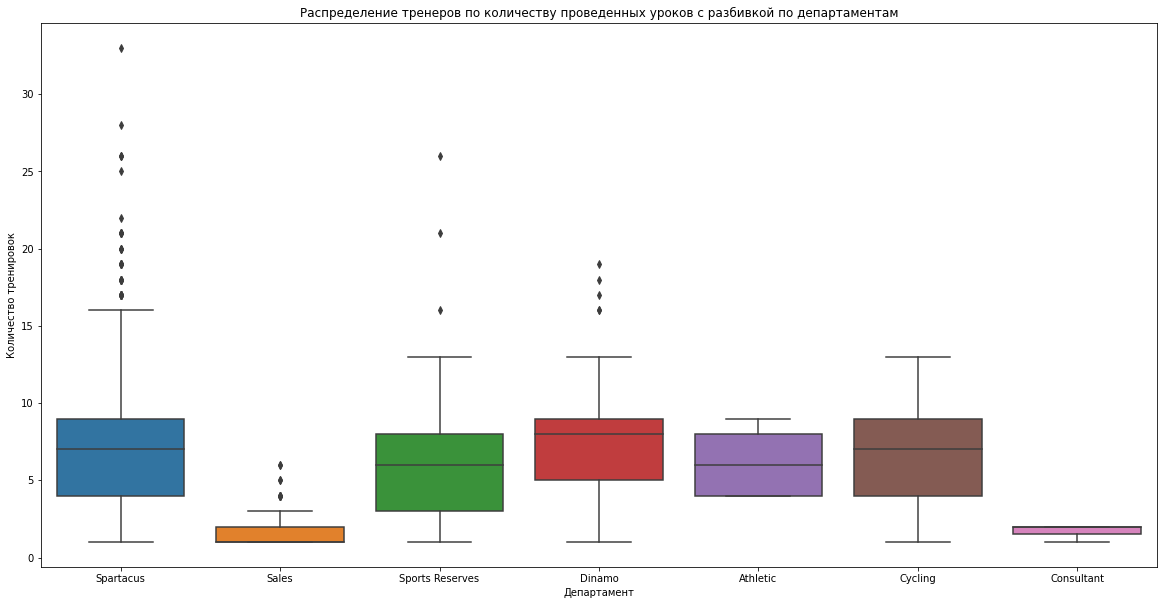

In [254]:
plt.figure(figsize=(20,10))
sns.boxplot(x="trainer_department", y="workouts", data=workouts_by_trainer)
plt.title('Распределение тренеров по количеству проведенных уроков с разбивкой по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество тренировок')
plt.show()

<b>Выводы:</b>
- Графики подтверждают, выводы, сделанные в предыдущем задании
- В департаментах: `Spartacus`, `Sports Reserves`, `Dinamo` точки над боксами, характеризующие выбросы, самые высокие, что говорит о наличии большого числа тренировок на одного тренера в день, они появляются достаточно редко, но такого в принципе быть не должно при  нормально распределенной нагрузке
- Среднее значение количества тренировок на тренера в день находится примерно на одном уровне у департаментов: `Spartacus`, `Sports Reserves`, `Dinamo`, `Athletic`, `Cycling` в отличие от департаментов: `Consultant`, `Sales`, что о говорит о неравномерности нагрузки среди департаментов
- Следует разружать департаменты `Spartacus`, `Sports Reserves`, `Dinamo` и нагружать `Consultant`, `Sales`

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [183]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

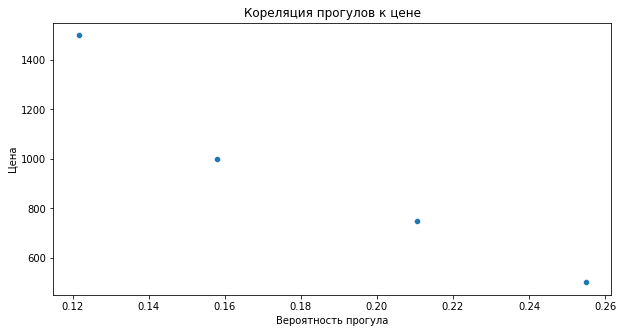

In [185]:
cost_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index() #считаем долю прогулов по цене 

plt.figure(figsize=(10,5))
sns.scatterplot(data=cost_data_agg, x="status", y="cost")
plt.title('Корреляция прогулов к цене')
plt.xlabel('Вероятность прогула')
plt.ylabel('Цена')
plt.show()

<b>Выводы:</b>
- График показывает, что чем выше цена, тем ниже вероятность прогула

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

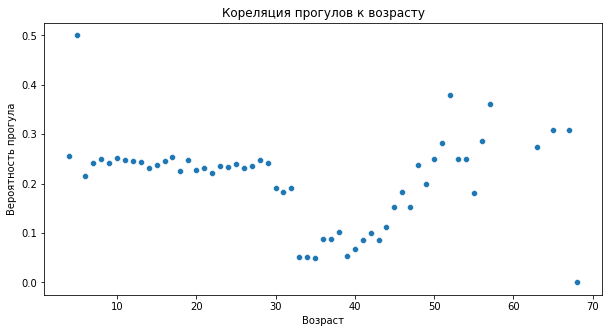

In [187]:
age_data_agg = cost_age_data.groupby(['age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

plt.figure(figsize=(10,5))
sns.scatterplot(data=age_data_agg, x="age", y="status")
plt.title('Корреляция прогулов к возрасту')
plt.xlabel('Возраст')
plt.ylabel('Вероятность прогула')
plt.show()

<b>Выводы:</b>
- Вероятность прогула для людей до 30 лет примерно одинакова
- У людей от 30 до 45 лет вероятность прогула ниже, чем у других возрастов
- У людей старше 45 лет вероятность прогула можно оценить как немного выше, чем у всех остальных возрастов

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

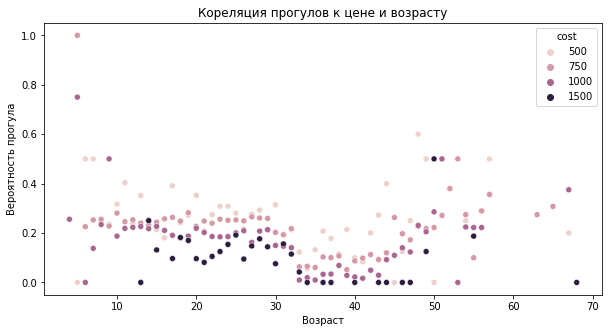

In [189]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cost_age_data_agg, x="age", y="status", hue="cost")
plt.title('Корреляция прогулов к цене и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Вероятность прогула')
plt.show()

<b>Выводы:</b>
- Более темные точки располагаются в нижней части графика, что говорит о зависимости, чем выше цена, тем меньше вероятность прогула. Так же одновременно распределение по возрастам показывает, что в левой части темные точки располагаются выше, чем в правой, а значит у более молодых людей вероятность прогула выше даже с более высокой стоимостью билета.
- Цвет точек становится светлее по мере возрастания вероятности прогула, что так же говорит о зависимости от цены

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [171]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [173]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()

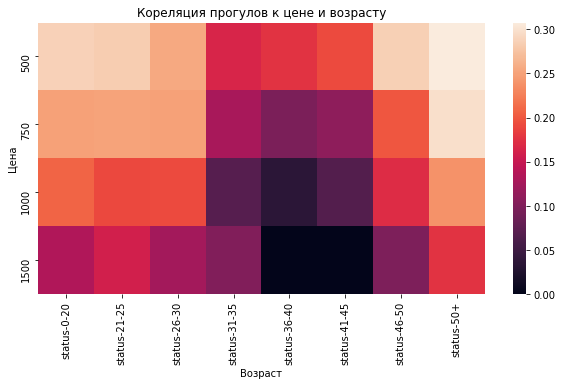

In [180]:
plt.figure(figsize=(10,5))
sns.heatmap(cost_age_data_agg.pivot("cost", "age_bin"))
plt.title('Корреляция прогулов к цене и возрасту')
plt.xlabel('Возраст')
plt.ylabel('Цена')
plt.show()

<b>Выводы:</b>
- Самые темные области нам говорят о низкой вероятности прогула и такие области располагаются на пересечении самых дорогих билетов и возрастов от 36 до 45 лет
- Цвет становится светлее по мере уменьшения цены, а значит, чем ниже цена, тем выше вероятность прогула
- В диапазоне от 36 до 45 лет наблюдается более низкая вероятность прогула относительно других возрастов

### Выводы по 4 заданию:

- Гипотеза о том, что на вероятность прогула влияет не только цена, но и возраст имеет место. Проанализировав данные, построив графики, можно сделать вывод, что люди в возрасте от 31 до 45 лет имеют более низкую вероятность прогула, чем остальные возраста.
- Гипотеза зависимости посещаемости от цены изначально предполагалась и очевидна, что подтверждают построенные графики.

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [204]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

In [233]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [206]:
trainings_by_day_frame['week_day_num'] += 1

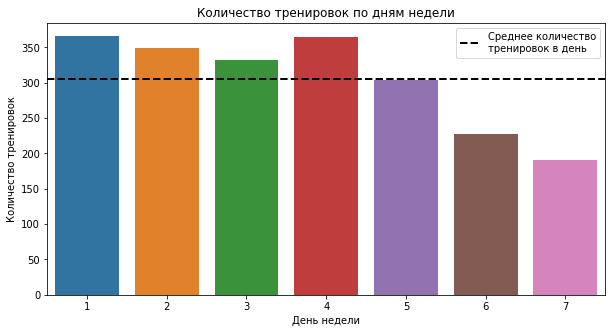

In [230]:
trainings_by_day = trainings_by_day_frame.groupby(['week_day_num']).mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="week_day_num", y="workouts", data=trainings_by_day)
plt.axhline(trainings_by_day_frame['workouts'].mean()
            , color='black'
            , linestyle='--'
            , linewidth=2
            , label='Среднее количество\nтренировок в день')

plt.title('Количество тренировок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество тренировок')
plt.legend()
plt.show()

<b>Выводы:</b>
- Наблюдается подтверждение сезонности количества тренировок по дням недели (в выходные меньше, в будни больше)

# 🎉🎉🎉 Поздравляем, ты великолепен! 